In [70]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd



import numpy as np
import seaborn as sns
import csv

In [2]:
data = pd.read_csv("RatingsData.csv")

data.head()

,title,country,year_added,release_year,rating,type1,user_rating_score
0,Grey's Anatomy,United States,2020.0,2019,TV-14,Romantic TV Shows,98
1,Supernatural,United States,2020.0,2019,TV-14,Classic & Cult TV,95
2,Breaking Bad,United States,2013.0,2013,TV-MA,Crime TV Shows,97
3,The Vampire Diaries,United States,2017.0,2017,TV-14,TV Dramas,91
4,The Walking Dead,United States,2019.0,2018,TV-MA,Classic & Cult TV,98


In [13]:
data = data.drop_duplicates(subset='title', keep="first")
data

,title,country,year_added,release_year,rating,type1,user_rating_score
0,Grey's Anatomy,United States,2020.0,2019,TV-14,Romantic TV Shows,98
1,Supernatural,United States,2020.0,2019,TV-14,Classic & Cult TV,95
2,Breaking Bad,United States,2013.0,2013,TV-MA,Crime TV Shows,97
3,The Vampire Diaries,United States,2017.0,2017,TV-14,TV Dramas,91
4,The Walking Dead,United States,2019.0,2018,TV-MA,Classic & Cult TV,98
...,...,...,...,...,...,...,...
297,Bunk'd,United States,2020.0,2020,TV-G,Kids' TV,61
302,An American Tail,United States,2018.0,1986,G,Children & Family Movies,67
303,Balto,United States,2018.0,1995,G,Children & Family Movies,64
305,The Pirate Fairy,United States,2014.0,2014,G,Children & Family Movies,57


In [22]:
#rating average per country
DataByCountry = data.groupby(["country"])

DataByCountry.mean().sort_values(["user_rating_score"], ascending = False)

,year_added,release_year,user_rating_score
country,,,
Egypt,2020.0,2019.000000,98.000000
Mexico,2018.0,2018.000000,96.000000
India,2019.0,2013.500000,90.500000
United Kingdom,2019.0,2018.600000,89.200000
Finland,2020.0,2019.000000,86.000000
United States,2018.0,2014.617647,84.323529
Russia,2020.0,2019.000000,81.000000
Canada,2017.0,2011.000000,78.333333
Australia,2020.0,2009.000000,74.000000


In [125]:
typeCountsA = data.value_counts(["type1"], ascending =True)
typeCountsA

typeCountsD = data.value_counts(["type1"], ascending =False)
typeCountsD



type1                       
Crime TV Shows                  29
TV Comedies                     19
Kids' TV                        19
TV Dramas                       15
Children & Family Movies        11
British TV Shows                 5
Romantic TV Shows                4
Classic & Cult TV                3
Comedies                         3
TV Horror                        2
Anime Series                     2
Action & Adventure               2
International TV Shows           2
Reality TV                       2
TV Action & Adventure            2
Dramas                           1
Documentaries                    1
Movies                           1
Classic Movies                   1
Stand-Up Comedy                  1
Stand-Up Comedy & Talk Shows     1
Horror Movies                    1
dtype: int64

<AxesSubplot:title={'center':'Type'}>

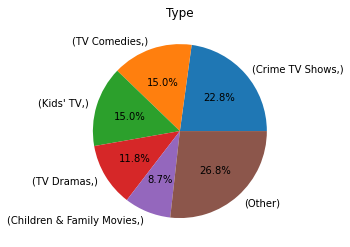

In [118]:
# pie chart of types of movies
top5=typeCountsD[:5].copy()
other = pd.Series([34], index = ['(Other)'])
top5AndOther = top5.append(other)
top5AndOther.rename("Type")

top5AndOther.plot.pie(ylabel ="", title="Type", autopct="%.1f%%")


In [155]:
# bar graph for average rating base on type
DataByType = data.groupby(["type1"])

DataByType.mean().sort_values(["user_rating_score"], ascending = False)

d = {
    'Crime TV Shows': 89.827586,
    'TV Comedies': 83.842105,
    'Kids TV': 75.894737,
    'TV Dramas': 81.800000,
    'Children & Family Movies': 78.454545,
    'Other': 84.016666
    }
ser=pd.Series(data = d, index = ['Crime TV Shows','TV Comedies','Kids TV', 'TV Dramas', 'Children & Family Movies','Other' ])

ser

Crime TV Shows              89.827586
TV Comedies                 83.842105
Kids TV                     75.894737
TV Dramas                   81.800000
Children & Family Movies    78.454545
Other                       84.016666
dtype: float64

Text(0.5, 0, 'Score')

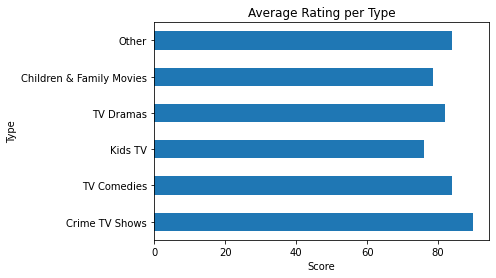

In [158]:

ax1 = ser.plot.barh()
ax1.set_title("Average Rating per Type")
ax1.set_ylabel("Type")
ax1.set_xlabel("Score")

In [129]:
DataByType = data.groupby(["type1"])

DataByType.mean().sort_values(["user_rating_score"], ascending = False)


,year_added,release_year,user_rating_score
type1,,,
Classic & Cult TV,2019.500000,2013.333333,97.000000
Stand-Up Comedy,2017.000000,2016.000000,97.000000
Stand-Up Comedy & Talk Shows,2017.000000,2017.000000,94.000000
TV Action & Adventure,2020.000000,2020.000000,93.000000
Romantic TV Shows,2018.750000,2015.500000,92.750000
TV Horror,2019.500000,2019.000000,90.000000
Crime TV Shows,2018.307692,2017.448276,89.827586
British TV Shows,2019.000000,2018.600000,89.200000
Action & Adventure,2016.500000,2016.500000,86.500000
